## Final Project 

### Constructing, Evaluating, and Visualizing Piplelines

### Due on <a href="https://summer.unc.edu/class-and-final-examination-schedules/">Final Exam</a> (6/22/23) @ 2:30 pm EST (see Assignment Folder in Sakai)

****

## Authorized help and collaboration rules

You **may not** collaborate with friends or teammates. You **may** use your notes, class provided resources (e.g., web links, notebooks,videos, slides) to help you solve the problems below. For effective learning, you should try to complete the worksheet on your own before looking for help. 

If you have any questions regarding what is, or is not, authorized you must ask. Saying after the fact you didn't understand, or were not sure, is not a valid excuse.

****

## Honor pledge

I pledge the COMP 116 honor code.

To the acknowledgethe **authororized help and collaboration rules** please edit the Markdown below and enter the requested information.

```
Onyen = mllandon
Author = Matthew Landon
PID = 730461081
```

****

## Python modules

In the coding cell below, are all the Python modules needed to complete your project. 

**No other module is authorized** and **if other modules are added, then points will be deducted**. 

****

In [32]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer

## Python Version Check

Verify you're running Python version `3.7.0` or later.

****

In [33]:
print(sys.version)

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]



****

### Heart disease data set

Data that is used to detect a `healthy` or `unhealthy` heart condition using the <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset">heart disease</a> dataset.

- **age** : Age of the patient
- **sex** : Sex of the patient
    - Value 0: Female
    - Value 1: Male
- **cp** : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- **trestbps** : resting blood pressure (in mm Hg)
- **chol** : cholestoral in mg/dl fetched via BMI sensor
- **fbs** : fasting blood sugar > 120 mg/dl
    - Value 1: true
    - Value 0: false
- **restecg** : resting electrocardiographic result
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach** : maximum heart rate achieved
- **pcp** : peak cardiac power (product of the peak mean arterial blood pressure and CO divided by 451)
- **ca** : number of major vessels (0-3) colored by flourosopy
- **thal** : thalassemia blood disorder
    - Value 1 = normal
    - Value 2 = fixed defect 
    - Value 3 = reversable defect
- **target** : condition label
    - Value 0: healthy 
    - Value 1: unhealthy

In [34]:
heart_df = pd.read_csv("heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,pcp,ca,thal,target
0,52,1,0,125,212,0,1,168,1.0,2,3,0
1,53,1,0,140,203,1,0,155,3.1,0,3,0
2,70,1,0,145,174,0,1,125,2.6,0,3,0
3,61,1,0,148,203,0,1,161,0.0,1,3,0
4,62,0,0,138,294,1,1,106,1.9,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,0.0,0,2,1
1021,60,1,0,125,258,0,0,141,2.8,1,3,0
1022,47,1,0,110,275,0,0,118,1.0,1,2,0
1023,50,0,0,110,254,0,0,159,0.0,0,2,1


****

## Question 1: Visualizing Data Relationships (5 Points)

<img src="p_q1_plot.png" width="550" style="float: right"/>

Create a combined plot that visualizes the relationships listed below for **male** patients that have a **healthy** heart condition and **male** patient that have an **unhealthy** heart condition.
- ``Resting Blood Pressure`` and ``Cholestoral``, 
- ``Resting Blood Pressure`` and ``Age``, 
- ``Resting Blood Pressure`` and ``Maximum Heart Rate Achieved``, and 
- ``Resting Blood Pressure`` and ``Peak Cardiac Power``. 

To recieve full credit your plotting solution **must** use:
1. the data provided in the **heart_df** dataframe,
2. the <a href="https://matplotlib.org/">Matplotlib</a> Python library (i.e., **do not** use Panda plotting capabilities), and 
3. create a plotting solution that is **visually identical** to the `plot shown on the right`. 

You may assume:
- The colors used to generate plots are blue (healthy) and red (unhealthy)
- The figsize=(12,12)
- Minimum x-axis tick value is `80` and maximum x-axis tick value is `240` (increments of 20)
- Please use the default y-axis tick values (i.e., nothing needs to be done)

Hints:
- Dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Selecting, Slicing, and Extracting</a> 
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html">xticks</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">subplot</a>


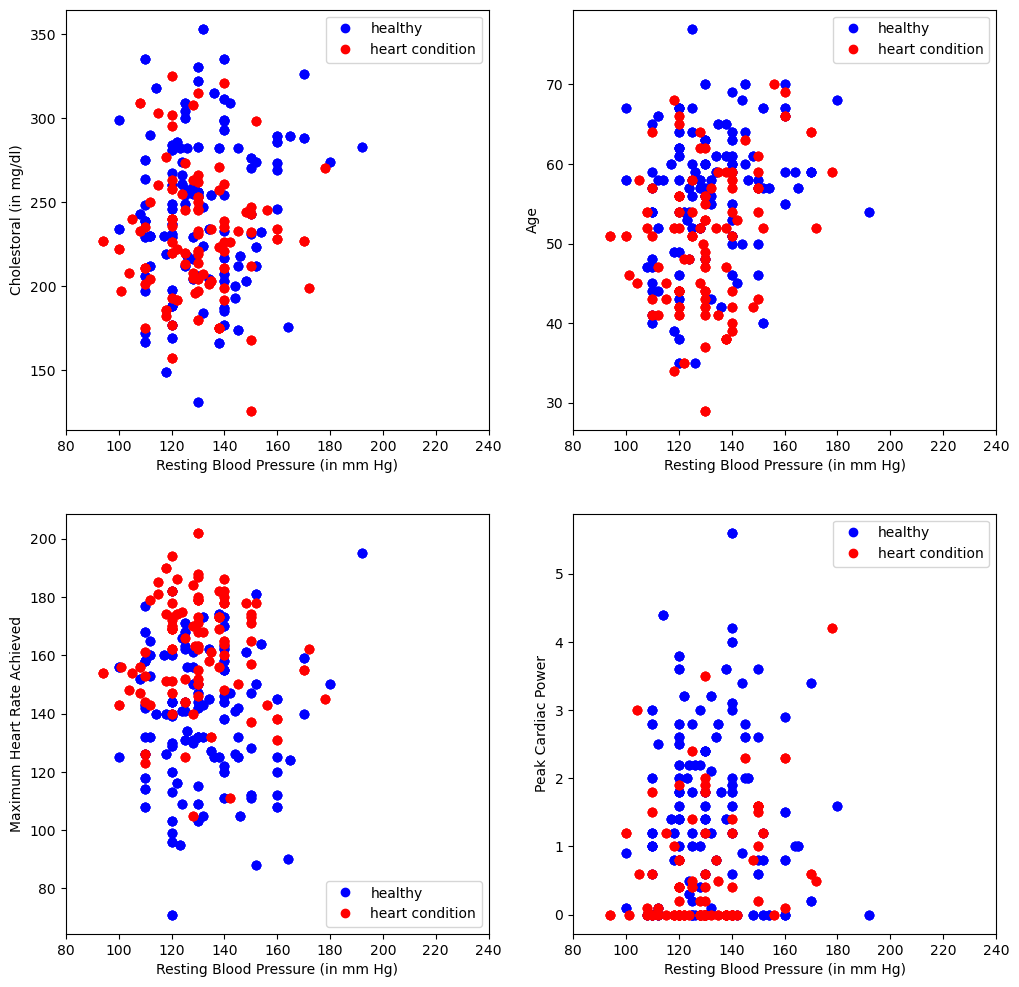

In [35]:
# -------------------------------------
# Add your plotting solution below
# -------------------------------------
Hheart_df = heart_df[(heart_df["target"]==0) & (heart_df["sex"]==1)]
Uheart_df = heart_df[(heart_df["target"]==1) & (heart_df["sex"]==1)]

colors=["blue","red"]

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.plot("trestbps","chol","bo", data =Hheart_df)
plt.plot("trestbps","chol","ro", data =Uheart_df)
plt.xticks(np.arange(80,241,20))
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Cholestoral (in mg/dl)")
plt.legend(["healthy", "heart condition"])

plt.subplot(222)
plt.plot("trestbps","age","bo", data =Hheart_df)
plt.plot("trestbps","age","ro", data =Uheart_df)
plt.xticks(np.arange(80,241,20))
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Age")
plt.legend(["healthy", "heart condition"])

plt.subplot(223)
plt.plot("trestbps","thalach","bo", data =Hheart_df)
plt.plot("trestbps","thalach","ro", data =Uheart_df)
plt.xticks(np.arange(80,241,20))
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Maximum Heart Rate Achieved")
plt.legend(["healthy", "heart condition"])

plt.subplot(224)
plt.plot("trestbps","pcp","bo", data =Hheart_df)
plt.plot("trestbps","pcp","ro", data =Uheart_df)
plt.xticks(np.arange(80,241,20))
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Peak Cardiac Power")
plt.legend(["healthy", "heart condition"])
plt.show()


*****

### Question 2: Pipeline and Data Partition (4 Points)

Construct a three stage pipeline:
- `First stage`: Imputation (replacement algorithm = mean )
- `Second stage`: Min/Max scaling (new range [-1, 1] )
- `Third stage`: Logistic classifier (solver is lbfgs)

Data partitioning assumptions:
- 10 folds
- Random shuffle (True)
- Stratification (True)

**Note**: there is no visualization for this question!

Hints:
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html">StratifiedKFold</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">SimpleImputer</a>


In [36]:
# -------------------------------------
# Add solution below
# -------------------------------------
pipeline = Pipeline( [ ( "imputer", SimpleImputer() ), 
                       ( "min_max_scaler", MinMaxScaler(feature_range=(-1,1)) ), 
                       ( "logit_classifier", LogisticRegression( solver="liblinear") ) ] )

kfold = StratifiedKFold( n_splits=10, shuffle=True )

*****

## Question 3: Pipeline Performance Evaluation (6 points)

<img src="p_q3_plot.png" width="550" style="float: right"/>

Create a combined plot that evaluate the classification performance of each pipeline created by the 10-fold cross-validation approach. In particular,
- only `male` data used in this analysis,
- the input data (X) is ``Resting Blood Pressure`` and ``Maximum Heart Rate Achieved``, and
- the classification labels (y) are the ``target`` values. 

To recieve full credit your plotting solution must use:
1. the data provided in the **heart_df** dataframe,
2. the <a href="https://matplotlib.org/">Matplotlib</a> Python library (i.e., **do not** use Panda plotting capabilities), and 
3. create a plotting solution that is **visually similar** to the `plot shown on the right`. **Note**: because random shuffling is used, your quantile and plotting results will be different, so please keep this in mind.

You may assume:
- The colors used to generate plots are blue (healthy) and red (unhealthy)
- The color of the classification decision line is green.
- The figsize=(15,5)
- Boxplot y-axis ticks are not displayed
- Boxplot x-axis ticks are between 0.5 and 0.9 (inclusive) and increments of 0.1.
- Classification plot may use the default x and y-axis tick values (should be between -1 and 1 (inclusive)).
- Decision line will start at Resting Blood Pressure = -1 and end at Resting Blood Pressure = 1 (inclusive) using increments of 0.1.
- Please use the default y-axis tick values (i.e., nothing needs to be done)
- Text that displays the Q1, Q2, and Q3 quantiles is above box, is vertically and horizontally centered, and all values rounded to `two` decimal places. 
- Text bounding box (bbox) is set to `dict( boxstyle="round", facecolor="wheat" )`
- The cross_validate `scoring` parameter is set to `accuracy`

Hints:
- Dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Selecting, Slicing, and Extracting</a> 
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">subplot</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html">text</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a>
- Numpy <a href="https://numpy.org/doc/stable/reference/generated/numpy.quantile.html">quantile</a>

C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\m

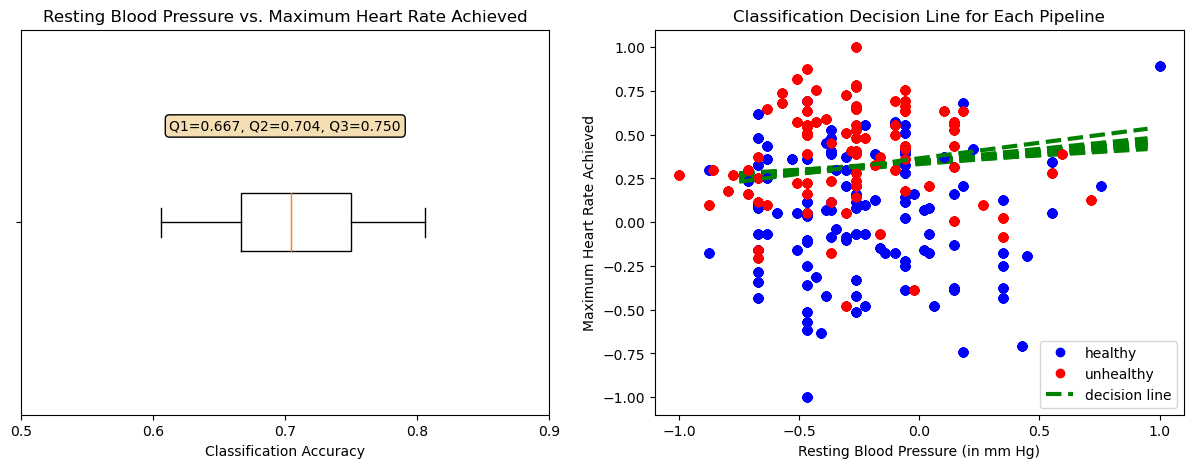

In [49]:
# -------------------------------------
# Add your plotting solution below
# -------------------------------------
Mdf = heart_df[heart_df["sex"]==1]

plt.figure(figsize=(15,5))

X = Mdf[["trestbps","thalach"]]
y = Mdf["target"]

res_dict = cross_validate( pipeline, X, y, cv=kfold, scoring="accuracy", return_estimator=True )
acc_vals = res_dict["test_score"]

plt.subplot(121)
plt.title("Resting Blood Pressure vs. Maximum Heart Rate Achieved")
plt.boxplot(acc_vals, labels=[""], vert=False)
plt.xticks(np.arange(0.5,1,0.1))
plt.xlabel("Classification Accuracy")

rstr = "Q1={0:.3f}, Q2={1:0.3f}, Q3={2:0.3f}".format( np.quantile( acc_vals, 0.25), np.quantile( acc_vals, 0.5 ), np.quantile( acc_vals, 0.75 ) )
plt.text( 0.7, 1.25, rstr, horizontalalignment='center', verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat') )


plt.subplot(122)
plt.title("Classification Decision Line for Each Pipeline")

healthy = Mdf[Mdf["target"]==0]
unhealthy = Mdf[Mdf["target"]==1]

for i in range(0, len(res_dict["estimator"])):
        Th = res_dict["estimator"][i]["min_max_scaler"].transform( healthy[["trestbps", "thalach"]] )
        Tu = res_dict["estimator"][i]["min_max_scaler"].transform( unhealthy[["trestbps", "thalach"]] )
        
        c = res_dict["estimator"][i]["logit_classifier"].intercept_[0]
        w = res_dict["estimator"][i]["logit_classifier"].coef_[0]
        b = -c/w[1]
        m = -w[0]/w[1]
        
        plt.plot( Th[:,0], Th[:,1], "bo")
        plt.plot( Tu[:,0], Tu[:,1], "ro")
        
        ticks = np.arange( -0.75, 1, 0.1 ).reshape( (-1,1) ) 
        plt.plot( ticks, ( ticks*m + b ), 'g--', lw=3 ) 
        
plt.xticks(np.arange(-1,1.5, 0.5))
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Maximum Heart Rate Achieved")
plt.legend(["healthy", "unhealthy", "decision line"])
plt.show()


*****

## Question 4: Pipeline Performance Evaluation (5 points)

<img src="p_q4_plot.png" width="550" style="float: right"/>

Create a combined plot that evaluates the classification performance of each pipeline created by the 10-fold cross-validation approach. In particular,
- only `male` data used in this analysis,
- the input data (X) is ``Resting Blood Pressure`` and ``Peak Cardiac Power``, and
- the classification labels (y) are the ``target`` values. 

To recieve full credit your plotting solution must use:
1. data provided in the **heart_df** dataframe,
2. <a href="https://matplotlib.org/">Matplotlib</a> Python library (i.e., **do not** use Panda plotting capabilities), and 
3. create a plotting solution that is **visually similar** to the `plot shown on the right`. **Note**: because random shuffling is used, your quantile and plotting results will be different, so please keep this in mind.

May assume:
- The colors used to generate plots are blue (healthy) and red (unhealthy)
- The color of the classification decision line is green.
- The figsize=(15,5)
- Boxplot y-axis ticks are not displayed
- Boxplot x-axis ticks are between 0.5 and 0.9 (inclusive) and increments of 0.1.
- Classification plot may use the default x and y-axis tick values (should be between -1 and 1 (inclusive)).
- Decision line will start at Resting Blood Pressure = -1 and end at Resting Blood Pressure = 1 (inclusive) using increments of 0.1.
- Please use the default y-axis tick values (i.e., nothing needs to be done)
- Text that displays the Q1, Q2, and Q3 quantiles is above box, is vertically and horizontally centered, and all values rounded to two decimal places. 
- Text bounding box (bbox) is set to `dict( boxstyle="round", facecolor="wheat" )`
- The cross_validate `scoring` parameter is set to `accuracy`

Hints:
- Dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Selecting, Slicing, and Extracting</a> 
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">subplot</a>
- Matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html">text</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a>
- Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a>
- Numpy <a href="https://numpy.org/doc/stable/reference/generated/numpy.quantile.html">quantile</a>


C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\mland\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\m

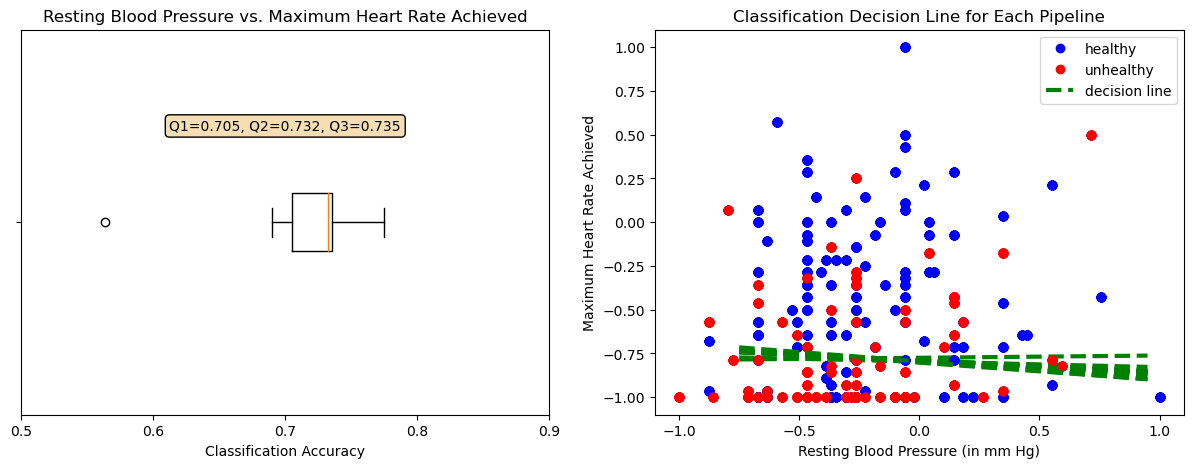

In [48]:
# -------------------------------------
# Add your plotting solution below
# -------------------------------------
Mdf = heart_df[heart_df["sex"]==1]

plt.figure(figsize=(15,5))

X = Mdf[["trestbps","pcp"]]
y = Mdf["target"]

res_dict = cross_validate( pipeline, X, y, cv=kfold, scoring="accuracy", return_estimator=True )
acc_vals = res_dict["test_score"]

plt.subplot(121)
plt.title("Resting Blood Pressure vs. Maximum Heart Rate Achieved")
plt.boxplot(acc_vals, labels=[""], vert=False)
plt.xticks(np.arange(0.5,1,0.1))
plt.xlabel("Classification Accuracy")

rstr = "Q1={0:.3f}, Q2={1:0.3f}, Q3={2:0.3f}".format( np.quantile( acc_vals, 0.25), np.quantile( acc_vals, 0.5 ), np.quantile( acc_vals, 0.75 ) )
plt.text( 0.7, 1.25, rstr, horizontalalignment='center', verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat',) )


plt.subplot(122)
plt.title("Classification Decision Line for Each Pipeline")

healthy = Mdf[Mdf["target"]==0]
unhealthy = Mdf[Mdf["target"]==1]

for i in range(0, len(res_dict["estimator"])):
        Th = res_dict["estimator"][i]["min_max_scaler"].transform( healthy[["trestbps", "pcp"]] )
        Tu = res_dict["estimator"][i]["min_max_scaler"].transform( unhealthy[["trestbps", "pcp"]] )
        
        c = res_dict["estimator"][i]["logit_classifier"].intercept_[0]
        w = res_dict["estimator"][i]["logit_classifier"].coef_[0]
        b = -c/w[1]
        m = -w[0]/w[1]

        plt.plot( Th[:,0], Th[:,1], "bo" )
        plt.plot( Tu[:,0], Tu[:,1], "ro" )
        
        ticks = np.arange( -0.75, 1, 0.1 ).reshape( (-1,1) ) 
        plt.plot( ticks, ( ticks*m + b ), 'g--', lw=3 ) 

plt.xticks(np.arange(-1,1.5,0.5))
plt.xlabel("Resting Blood Pressure (in mm Hg)")
plt.ylabel("Maximum Heart Rate Achieved")
plt.legend(["healthy", "unhealthy", "decision line"])
plt.show()